# Ejercicio 1

La proporción de oyentes se compone por un 90% de viejos y 10% de jovenes.

Tabla de probabilidades condicionadas ( P(Columna | Fila) ):

| --- | Programa 1 | Programa 2 | Programa 3 | Programa 4 |
| --- | --- | --- | --- | --- |
| Joven | 0.95 | 0.05 | 0.02 | 0.2 |
| Viejo | 0.03 | 0.82 | 0.34 | 0.92 |

Representamos los eventos de la siguiente forma:
- J: el oyente es joven
- V: el oyente es viejo
- Gi: al oyente le gusta el programa i
***
Queremos encontrar la probabilidad de que sea joven dado que le gustan los programas 1 y 3, y no le gustan los programas 2 y 4. Es decir:
<br><br>
P(J | G1, G3, !G2, !G4)
<br><br>
Por el teorema de Bayes obtenemos que:
<br><br>
P(J | G1, G3, !G2, !G4) = P(G1, G3, !G2, !G4 | J).P(J) / P(G1, G3, !G2, !G4)
<br><br>
Y si asumimos independencia condicionada entre sucesos y aplicando el teorema de probabilidad total en el denominador:
<br><br>
P(J | G1, G3, !G2, !G4) = P(G1|J).P(G3|J).P(!G2|J).P(!G4|J).P(J) / (P(G1, G3, !G2, !G4 | J).P(J) + P(G1, G3, !G2, !G4 | V).P(V))
<br><br>
Finalmente, utilizando los datos del enunciado:
<br><br>
P(J | G1, G3, !G2, !G4) = 0.92
***
Ahora queremos encontrar la probabilidad de que el oyente sea viejo dado los mismos gustos. Es decir:
<br><br>
P(V | G1, G3, !G2, !G4)
<br><br>
Considerando que el oyente o es viejo o es joven:
<br><br>
P(V | G1, G3, !G2, !G4) = P(!J | G1, G3, !G2, !G4) = 1 - P(J | G1, G3, !G2, !G4) = 0.08

# Ejercicio 2

Calculamos para todo \begin{equation*} v_j \end{equation*}

\begin{equation*}
\prod_{i = 1}^{n} P(x_i | v_j) * P(v_j)
\end{equation*}

y tomamos el máximo valor calculado, la categoría correspondiente a ese valro será la que retorna el clasificador

Importamos las librerias

In [1]:
import pandas as pd
from TP1.src.Ej2 import divide_by_nationality
from TP1.src.NaiveBayes import NaiveBayes

Leemos los datos y los dividimos por nacionalidad

In [2]:
data = pd.read_excel('../PreferenciasBritanicos.xlsx', sheet_name='Hoja1', )

britanicos = divide_by_nationality(data, 'I')
escocesas = divide_by_nationality(data, 'E')

datasets = [britanicos, escocesas]

Entrenamos Bayes

In [3]:
nb = NaiveBayes()
nb.train(datasets)

Buscamos la nacionalidad con las caracteristicas solicitadas

In [4]:
category = nb.calculate_category([1, 0, 1, 1, 0])

print("Es de Nacionalidad :" + str(datasets[category]['Nacionalidad'].values[0]))

Es de Nacionalidad :E


# Código de entrenamiento
    def train(self, datasets, possible_values=None):
        self.datasets = datasets
        self.probabilities = []
        self.general_probabilities = []
        # Para cada conjunto
        for dataset in datasets:
            probabilities = []
            # Por cada propiedad
            for i in range(0, len(dataset.columns)):

                # Inicializamos las probabilidades locales
                if possible_values is None:
                    occurrences_map = {0: 0, 1: 0}
                else:
                    occurrences_map = {}
                    if isinstance(possible_values[0], list):
                        for value in possible_values[i]:
                            occurrences_map[value] = 0
                    else:
                        for value in possible_values:
                            occurrences_map[value] = 0

                # Sumamos las ocurrencias en la columna
                for item in dataset[dataset.columns[i]]:
                    if item in occurrences_map:
                        occurrences_map[item] += 1
                    else:
                        occurrences_map[item] = 1

                # Sumamos las ocurrencias generales
                self.sum_general_probabilities(occurrences_map, i)

                # Calculamos la probabilidad
                for key in occurrences_map.keys():
                    occurrences_map[key] = (occurrences_map[key] + 1) / (len(dataset) + len(occurrences_map.keys()))

                # Lo agrego a las probabilidades del dataset
                probabilities.append(occurrences_map)

            # Lo agrego a las probabilidades de los datasets
            self.probabilities.append(probabilities)

        # Calculo las probabilidades generales
        for column_map in self.general_probabilities:
            for key in column_map:
                column_map[key] = column_map[key] / len_datasets(datasets)

# Código para determinar la categoría

    def calculate_category(self, to_analize):
        results = []
        # Por cada dataset
        for j in range(0, len(self.probabilities)):
            probability = self.probabilities[j]
            result = 1
            # Productoria de probabilidades
            for i in range(0, len(to_analize)):
                property_dict = probability[i]
                result *= property_dict[to_analize[i]]

            # Multiplico por la probabilidad que pertenezca al dataset
            result *= len(self.datasets[j]) / len_datasets(self.datasets)
            results.append(result)

        # Tomo el maximo
        return results.index(max(results))


# Ejercicio 3

Importamos el dataset y librerias.

In [5]:
from TP1.src.Ej3 import add_columns_from_text, get_categories, separate_in_categories, confusion_matrix, get_metrics, \
    invert_dict, roc_curve
import pandas as pd
from TP1.src.NaiveBayes import NaiveBayes

df = pd.read_csv('../dataset/Noticias_argentinas.csv', nrows=1000)

df = df[['titular', 'categoria']]

A partir de los titulares generamos una matriz donde sus columnas son las palabras que se utilizaron
 para escribir todos los titulares del dataset. Es decir la union de los conjuntos de palabras utilizados para cada
 titular.

 Las filas de la matriz serán cada una de las noticias (igual que antes) y el valor que tomarán para cada
 columna será 1 si la palabra de la columna aparece en el titular de esta noticia y 0 en el caso de que no aparezca.

In [6]:

df = add_columns_from_text(df)
print(df)

                                               titular categoria  \
0    Trabajadores del Buenos Aires Design cortan la...  Nacional   
1    La boda del gobernador Gerardo Morales: tapas ...  Nacional   
2    Cumbre del G20: qué calles estarán cortadas y ...  Nacional   
3    Una fractura que confirma la candidatura de Cr...  Nacional   
4    Infierno grande: ola de divorcios en un pueblo...  Nacional   
..                                                 ...       ...   
995  Que de la mano de Maradona, todos la vuelta va...  Deportes   
996         El Halcón y el Pincha completan su partido  Deportes   
997  El enojo de Lionel Scaloni con un periodista e...  Deportes   
998          Los entrenadores de River con más títulos  Deportes   
999  El fuerte mensaje de Migue Granados para fomen...     Salud   

     trabajadores  del  buenos  aires  design  cortan  la  avenida  ...  \
0               1    1       1      1       1       1   1        1  ...   
1               0    1       0   

Obtenemos las 4 categorias que vamos a clasificar.

In [7]:
categories = get_categories(df)[0:4]

Separamos el dataset en training y test data.

In [8]:
train = df.sample(frac=0.8)
test = df.drop(train.index)

Particionamos los dataframes en categorias y luego eliminamos las columnas innecesarias.

In [9]:
train_datasets = separate_in_categories(train, categories)
test_datasets = separate_in_categories(test, categories)

train_datasets = [df.drop(columns=['titular', 'categoria']) for df in train_datasets]
test_datasets = [df.drop(columns=['titular', 'categoria']) for df in test_datasets]

Creamos una instancia de nuestra implementación de Naive Bayes y entrenamos con nuestro dataset de entrenamiento.

In [10]:
nb = NaiveBayes()
nb.train(train_datasets)

Generamos la matriz de confusión utilizando el dataset de prueba.

In [11]:
res = confusion_matrix(nb, test_datasets)
res_dic = {categories[i]: {categories[j]: res[i][j] for j in range(len(res[i]))} for i in range(len(res))}

print(pd.DataFrame.from_dict(res_dic))

               Economia  Destacadas  Internacional  Salud
Economia             20           0              0      0
Destacadas            1          21             12      0
Internacional         0           3              9      0
Salud                 1           5              8     20


Calculamos métricas de evaluación.

In [13]:
metrics_dic = get_metrics(res, categories)
print(pd.DataFrame.from_dict(invert_dict(metrics_dic)))

               TP  FN  FP  TN  Accuracy  Precision  F1-Score   FP-Rate  \
Economia       20   2   0  80  0.549451   1.000000  1.500000  0.000000   
Destacadas     21   8  13  79  0.534759   0.617647  1.155963  0.141304   
Internacional   9  20   3  91  0.473934   0.750000  1.448276  0.031915   
Salud          20   0  14  80  0.555556   0.588235  0.740741  0.148936   

                TP-Rate  
Economia       0.909091  
Destacadas     0.724138  
Internacional  0.310345  
Salud          1.000000  


Generamos un espacio ROC para graficar los resultados para cada categoria.
Cada punto roc representa la cantidad de TP y FP sobre una categoria particular.

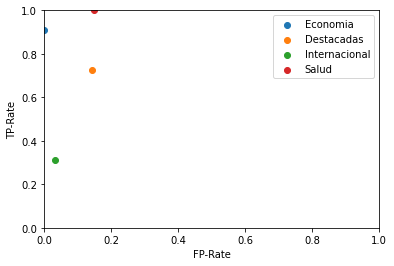

In [15]:
roc_curve(metrics_dic)

# Ejercicio 4

\begin{equation*}
P(admit = 0 | rank = 1) = \frac{P(admit = 0, rank = 1)}{P(rank = 1)} = \frac{\sum_{i=0}^1\sum_{j=0}^1 P(admit = 0, rank = 1, GPA = i, GRE = j)}{\sum_{i=0}^1\sum_{j=0}^1\sum_{k=0}^1 P(admit = k, rank = 1, GPA = i, GRE = j)}
\end{equation*}

\begin{equation*}Pa(x_i)\end{equation*}

son los nodos padres de \begin{equation*} x_i \end{equation*}



La probabilidad conjunta se define como:

\begin{equation*}
P(x_1, x_2, ... , x_n) = \prod_{i = 1}^{n} P(x_i | Pa(x_i))
\end{equation*}



Por lo tanto, en este caso particular, sería:

\begin{equation*}
P(admit, rank, GPA, GRE) = P(admit | rank, GPA, GRE) * P(GRE | rank) * P(GRA | rank) * P(rank)
\end{equation*}



Por ultimo, estimamos la probabilidad como en este ejemplo:

\begin{equation*}
P(admit = 1 | rank = 0, GPA = 1, GRE =0) = \frac{\# (admit=1 \& rank = 0 \& GPA = 1 \& GRE = 0)}{\# (rank = 0 \& GPA = 1 \& GRE = 0)}
\end{equation*}

Donde #(admit=1 & rank = 0 & GPA = 1 & GRE = 0) es el número de casos en los que se cumplen las cuatro condiciones.

Importamos las librerias

In [17]:
from TP1.src.BayesNetwork import BayesNetwork
import pandas as pd

Leemos los datos y los discretizamos

In [19]:
data = pd.read_csv('../dataset/binary.csv')

data['gre'] = (data['gre'] >= 500).astype(int)
data['gpa'] = (data['gpa'] >= 3).astype(int)

Creamos la red y calculamos las probabilidades

In [21]:
bn = BayesNetwork(data, {'rank': [], 'gre': ['rank'], 'gpa': ['rank'], 'admit': ['gre', 'gpa', 'rank']}, {'rank': [1, 2, 3, 4], 'gre': [0, 1], 'gpa': [0, 1], 'admit': [0, 1]})

print("P(admit = 0 | rank = 1) = " + str(bn.conditional_probability({'admit': 0}, {'rank': 1})))
print("P(admit = 1 | rank = 2, gre = 0, gpa = 1) = " + str(bn.conditional_probability({'admit': 1}, {'rank': 2, 'gre': 0, 'gpa': 1})))

P(admit = 0 | rank = 1) = 0.43213003213003215
P(admit = 1 | rank = 2, gre = 0, gpa = 1) = 0.21739130434782605


# Codigo

Probabilidad condicional

    def conditional_probability(self, principal_condition, conditions):
        all_conditions = dict(conditions)
        all_conditions.update(principal_condition)
        missing_nodes = [item for item in self.nodes if item not in all_conditions.keys()]
        missing_nodes_2 = [item for item in self.nodes if item not in conditions.keys()]

        return self.joint_sum(all_conditions, missing_nodes) / self.joint_sum(conditions, missing_nodes_2)

Resolver la sumatoria

    def joint_sum(self, conditions, missing_nodes):
        if len(missing_nodes) == 0:
            return self.joint_solver(conditions)

        new_missing_nodes = copy.deepcopy(missing_nodes)
        selected_missing = new_missing_nodes.pop()
        result = 0
        for value in self.node_values[selected_missing]:
            new_conditions = copy.deepcopy(conditions)
            new_conditions[selected_missing] = value
            result += self.joint_sum(new_conditions, new_missing_nodes)

        return result
        
Probabilida conjunta

    def joint_solver(self, conditions):
        result = 1
        for condition in conditions:
            denominador = self.data
            if len(self.parents[condition]) == 0:
                result *= (len(self.data[self.data[condition] == conditions[condition]]) + 1) / (len(self.data) + 1)
            else:
                for parent in self.parents[condition]:
                    denominador = denominador[denominador[parent] == conditions[parent]]

                nominador = denominador[denominador[condition] == conditions[condition]]
                result *= (len(nominador) + 1) / (len(denominador) + 1)

        return result